Basic Statistics

Descriptive Analytics and Data Preprocessing On Sales and Discounts Dataset

In [ ]:
#Import the packages

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [ ]:
#load the dataset

In [17]:
   df=pd.read_csv('sales_data_with_discounts.csv')

In [ ]:
#show the dataset

In [19]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
#Identify numerical columns in the dataset

In [27]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
#Calculate the mean, median, mode, and standard deviation for these columns

In [31]:
for col in numerical_cols.columns:
    mean_val = numerical_cols[col].mean()
    median_val = numerical_cols[col].median()
    mode_val = numerical_cols[col].mode()[0]  # mode() returns a Series
    std_val = numerical_cols[col].std()

    print(f"Column: {col}")
    print(f"  Mean: {mean_val}")
    print(f"  Median: {median_val}")
    print(f"  Mode: {mode_val}")
    print(f"  Standard Deviation: {std_val}\n")

Column: Volume
  Mean: 5.066666666666666
  Median: 4.0
  Mode: 3
  Standard Deviation: 4.231602391213926

Column: Avg Price
  Mean: 10453.433333333332
  Median: 1450.0
  Mode: 400
  Standard Deviation: 18079.90483993645

Column: Total Sales Value
  Mean: 33812.83555555555
  Median: 5700.0
  Mode: 24300
  Standard Deviation: 50535.07417255328

Column: Discount Rate (%)
  Mean: 15.155241895330914
  Median: 16.57776564929597
  Mode: 5.007822189204133
  Standard Deviation: 4.220602153325511

Column: Discount Amount
  Mean: 3346.499424342415
  Median: 988.9337332382784
  Mode: 69.17794228822787
  Standard Deviation: 4509.9029633539985

Column: Net Sales Value
  Mean: 30466.336131270138
  Median: 4677.788059301853
  Mode: 326.97480055470817
  Standard Deviation: 46358.656624066934



Inferences
1. Volume
   * Mean is slightly greater than the median. Hence it is very slightly positively skewed.
   * The most recurrent volume that has been sold is 3.
   * Since standard deviation is not less and almost equivalent to mean, the data seems to be highly dispersed. Some values are high contributing 
     to the high mean.
2. Avg Price
   * Mean is extremely greater than the median. This has positive skewness and few prices are very high contributing to the high mean. 
     There is a possibility of outliers
   * The most common price is 400 but the mean is really high which means the price of few mobiles is very high whereas most of the mobiles cost around 400
   * Standard deviation is very high than the mean. Therefore the data is heavily dispersed and there is a possibility of outliers.
3. Total Sales Value
   *The inferences are same as the Avg Price which means Avg Price and Total Sales value are highly correlated to each other.
4. Discount Rate (%)
   *Mean is slightly lesser than the median so, it contributes to light negative skewness.
   *The most commonly given discount percentage is 5
   *Standard deviation is less when compare to mean. Hence the distribution of data is stable to some extent.
5. Discount Amount
   *The data is highly dispersed since standard deviation is greater than the mean. 
   * Median is extremely lesser than the mean. It is positively skewed.
   * The common amount that was given as discount is 69 which is drastically lesser than the mean and also median. There are few few items whose discount 
     amount is very high
6. Net Sales Value
   *Negatively skewed, possibility of outliers, Highly dispersed

In [ ]:
#Identify categorical columns in the dataset

In [34]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

Data Visualization

In [ ]:
#histograms

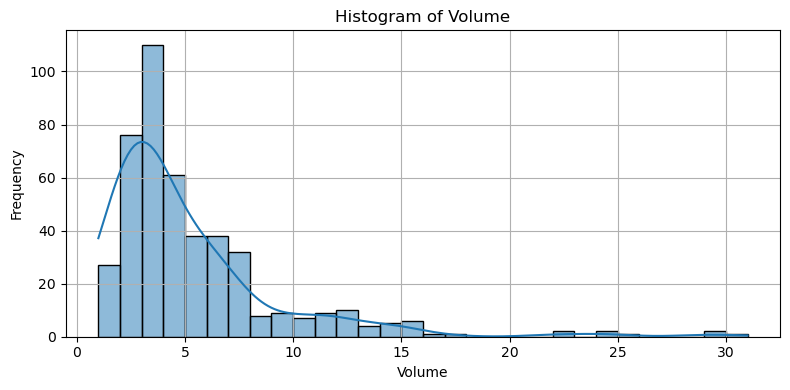

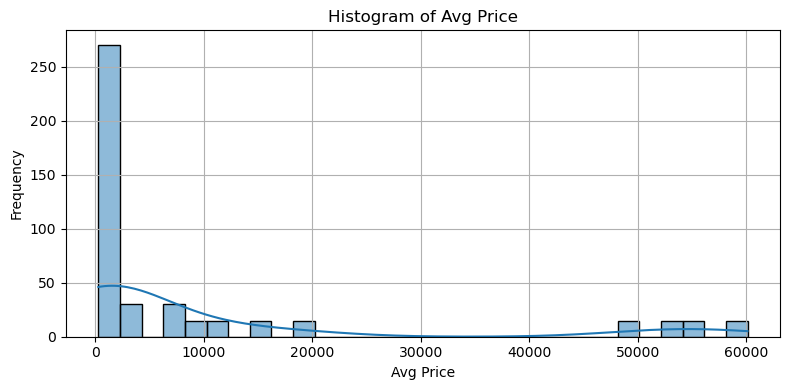

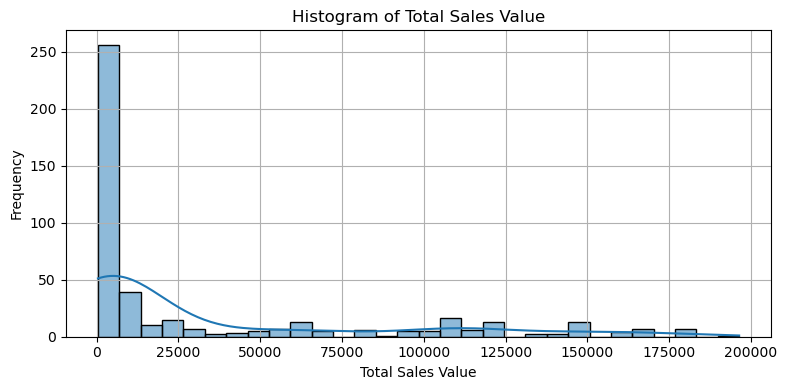

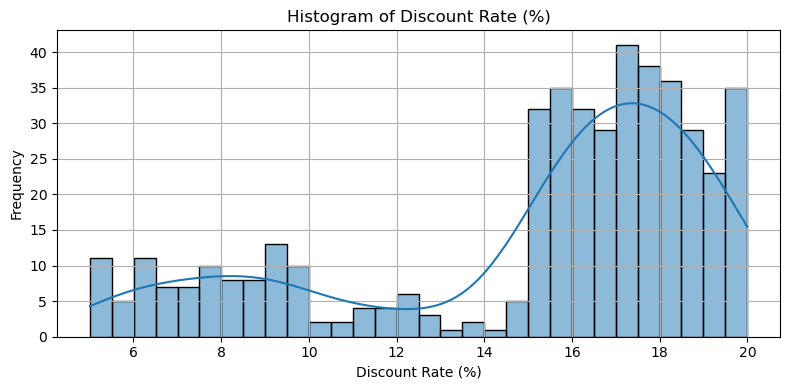

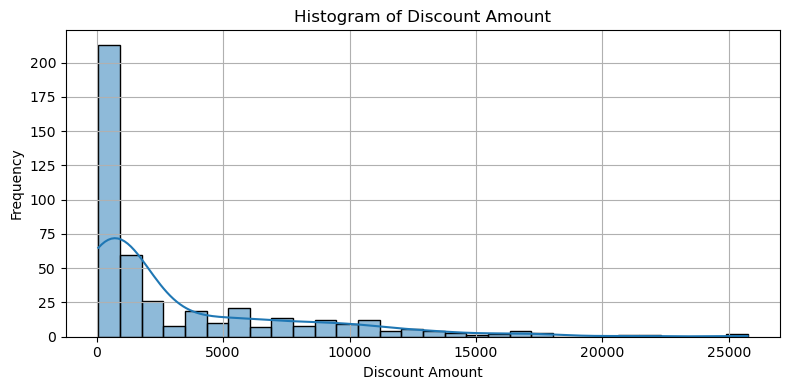

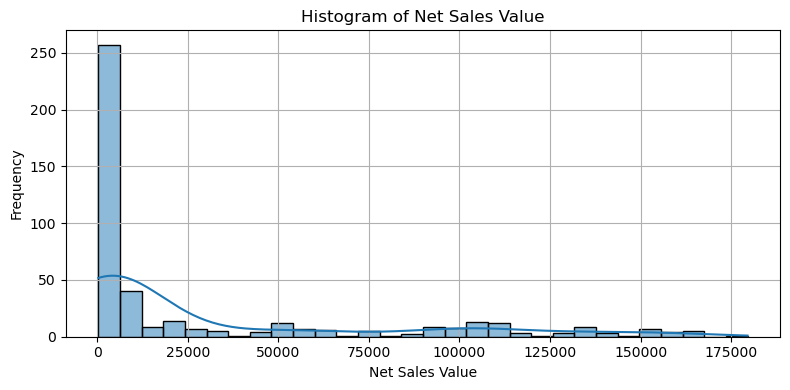

In [36]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Histogram Volume
* The histogram is right skewed , meaning mostly the number of units sold lies between 1 to 8.
* For few models the number of units sold lies between 9 to 18
* But for very few models number of units sold is between 20 to 30 which could be the potential outliers
* The graph is leptokurtic since it has sharp edges.

Histogram Avg Price

*The most repeated price is in the range of 0 to 2000 which has been repeated more than 250 times
* The average price for most of the items lies between 0 to 20000
* Leptokurtic and Positively skewed.
* Few data points lies between 50000 and 60000 and are far away from most of the data point which are outliers.

Histogram Total Sales Value

*Leptokurtic and Positively skewed.
*Most of the total sales values lies between 0 and 6000.
*There seems to be fluctuations in the spread of data

Histogram Discount Rate%

* For most of the items discount rate lies between 15% to 20%
* For rest of the items the discount rate ies between 2% to 14%
* The graph is negatively skewed since it has sharp edges on the left
* The concentration of the data is narror and possibility of outliers is negligible.

Histogram Discount Amount

*Leptokurtic and Positively skewed.
*For most of the items the amount that was given as a discount is in the range of 0 to 2000
*Few discount amount lies in the range 20000 to 25000 which are the potential outliers.

Histogram Net Sales Value

*Leptokurtic and Positively skewed.
*Low budget items are sold more when compared to high budget items

                               #Overall Inference#
* As the Value of the item increases, the number of units sold is less.
* As the Value of the item increases, discount rate is higher
* Total sales Value and Net Sales value are similar in the distribution of data.

In [51]:
#boxplot

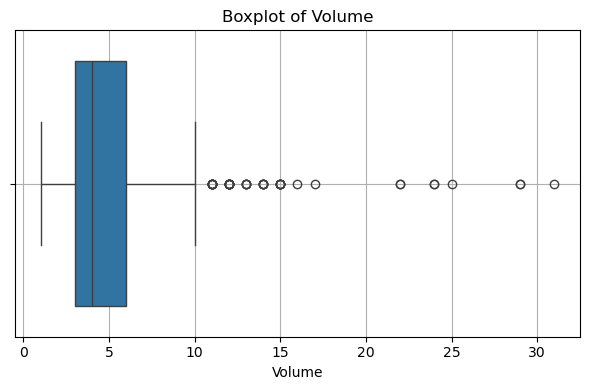

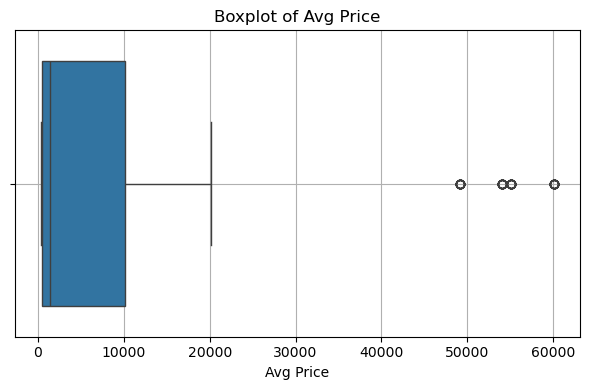

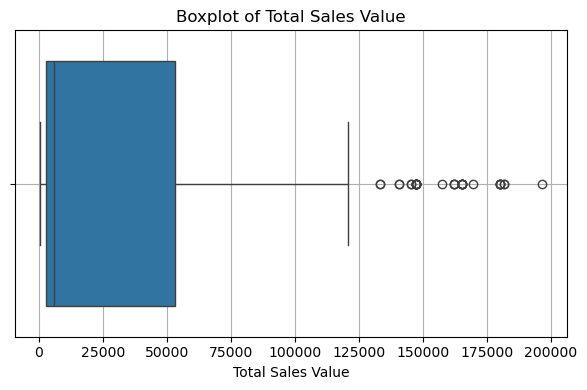

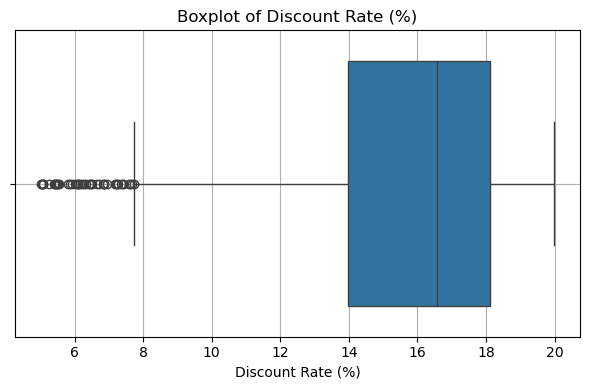

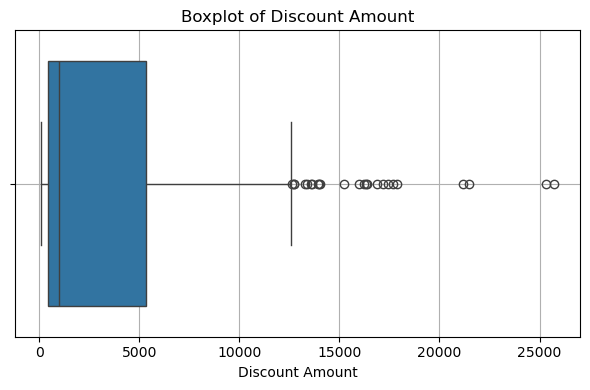

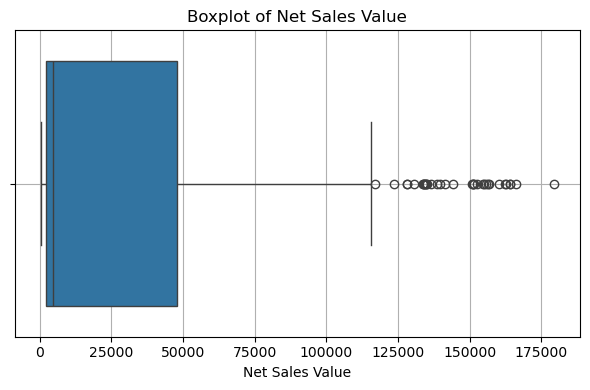

In [38]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#barchart

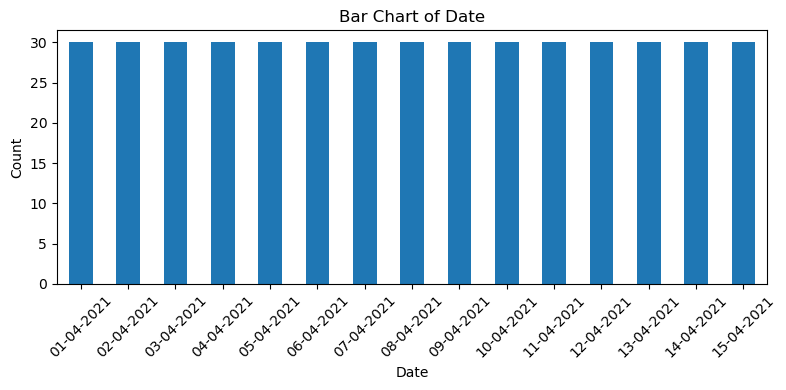

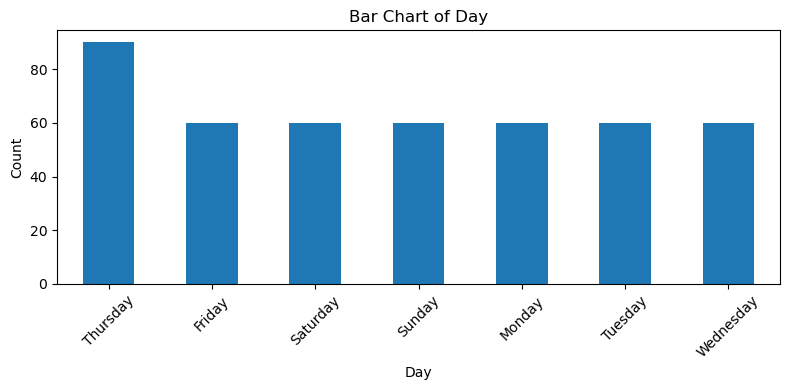

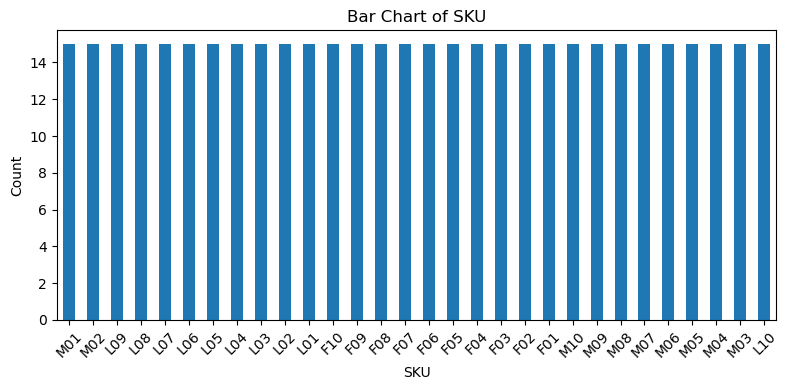

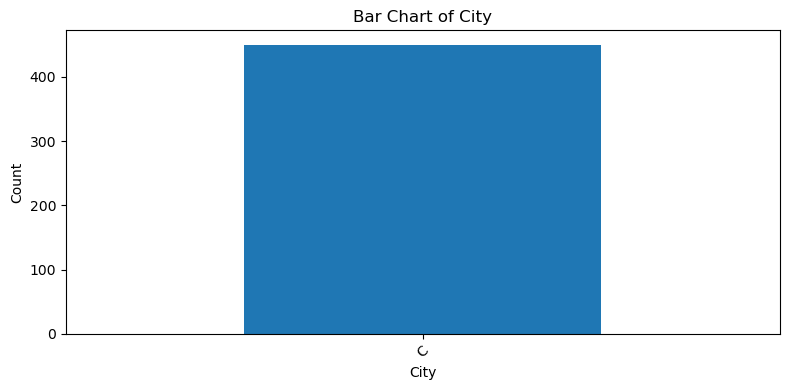

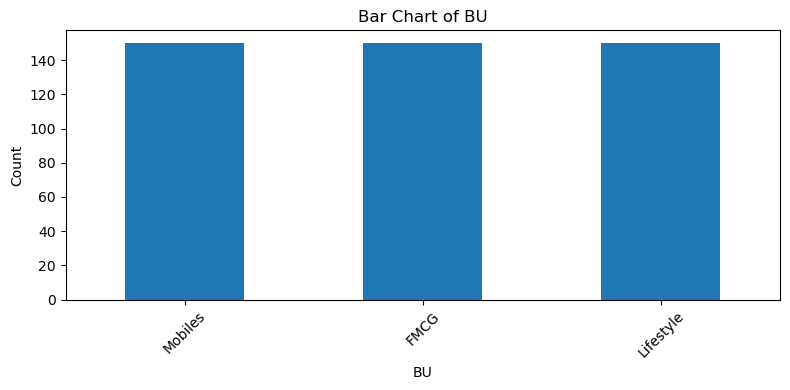

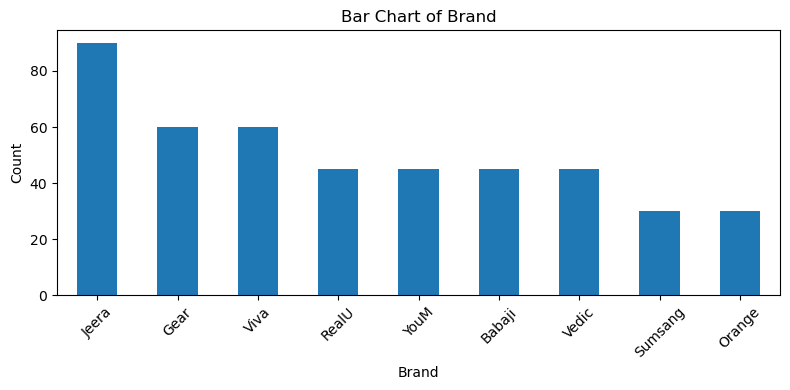

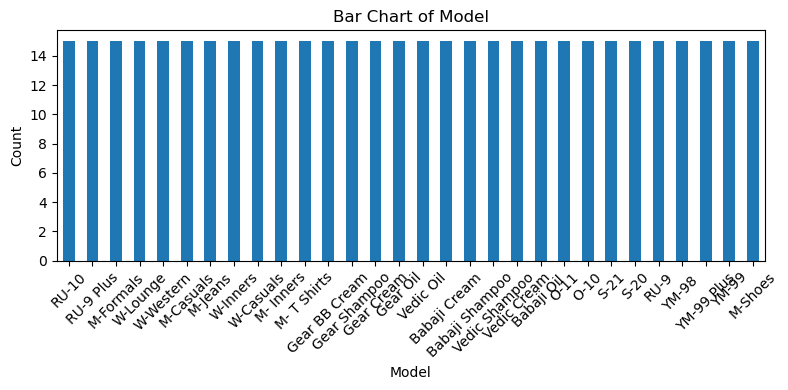

In [40]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Standardization of Numerical Variables
*Standardization is a data preprocessing technique that transforms numerical values into a common scale without distorting the differences in 
 the data’s distribution
*𝑋standardized =𝑋−𝜇/𝜎 (X- original data value, 𝜇 -> mean,𝜎 - standard deviation)
*This technique can be used when the data follows normal distribution(guassian), if model relies on distance-based calculations (KNN, K-Means, PCA, SVM)
*Features have different scales that could affect learning


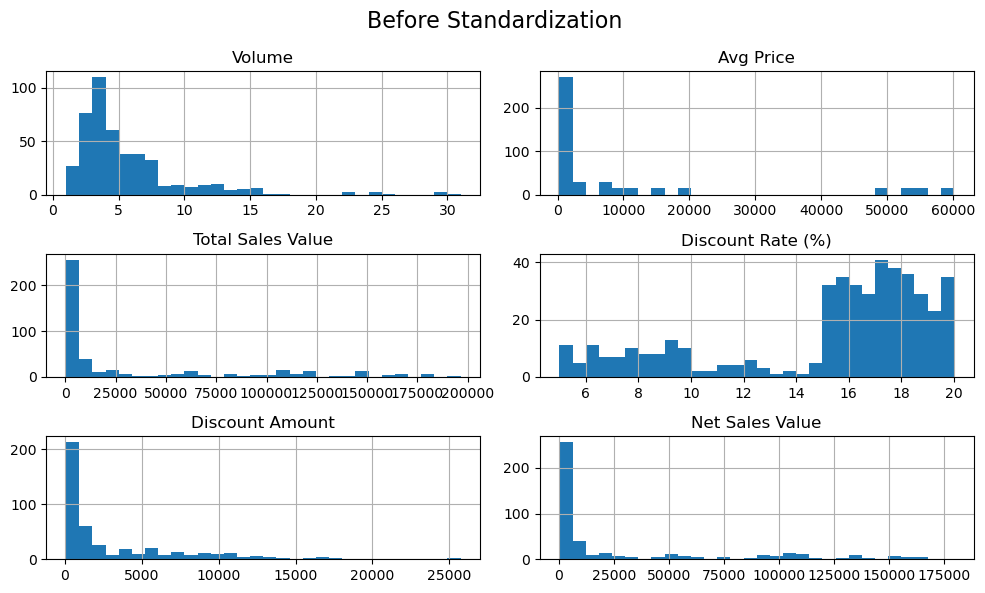

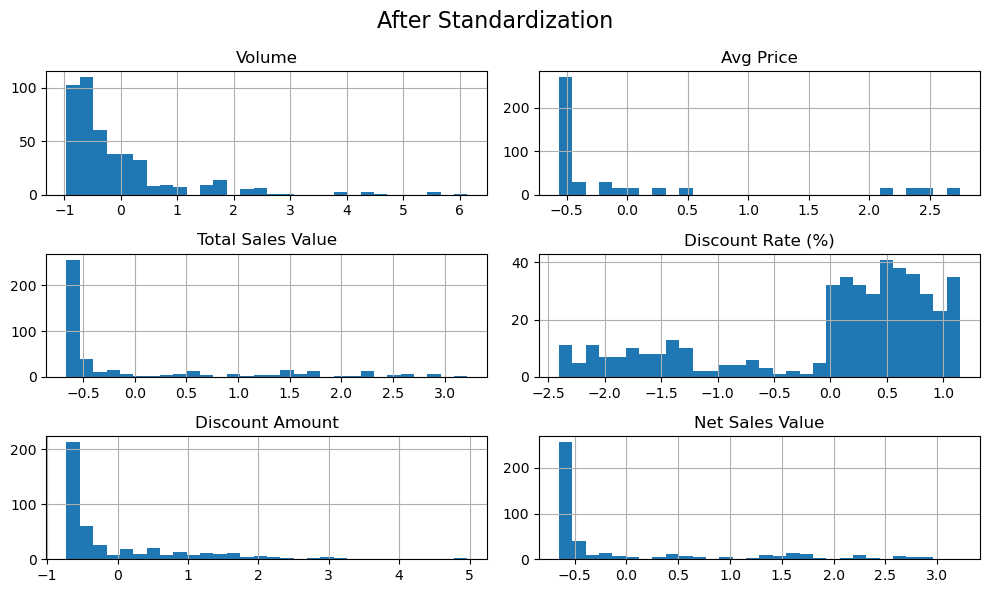

In [55]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols]
#Show original distribution (before standardization)
df_numerical.hist(figsize=(10, 6), bins=30)
plt.suptitle("Before Standardization", fontsize=16)
plt.tight_layout()
plt.show()

# Apply standardization
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Show new distribution (after standardization)
df_standardized.hist(figsize=(10, 6), bins=30)
plt.suptitle("After Standardization", fontsize=16)
plt.tight_layout()
plt.show()


Conversion of Categorical Data into Dummy Variables

In [57]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Display a sample of the encoded dataset
print(df_encoded.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

conclusion

Key Finding from Descriptive Analytics and Visualizations

Numerical Features:
Histograms revealed the distribution of numerical variables, highlighting patterns such as skewness, normality, or the presence of outliers.

Boxplots identified extreme values and provided insights into data spread using the interquartile range (IQR).

Descriptive statistics (mean, median, mode, standard deviation) offered quantitative summaries that helped interpret each feature’s central tendency and dispersion.

Categorical Features:

Bar charts effectively visualized the frequency of each category, making it easy to spot imbalanced classes or dominant categories, which can impact model performance.

Importance of Data Preprocessing in Data Analysis & Machine Learning

Standardization:
Scaled numerical features to have a mean of 0 and a standard deviation of 1.

This is critical for models sensitive to feature magnitude as it ensures uniform influence across variables.

One-Hot Encoding
Transformed categorical variables into binary dummy variables, enabling their use in ML algorithms that require numerical inputs.

Avoids misinterpretation of category relationships that might occur if labels are left as strings or converted to ordinal numbers arbitrarily.